objective: The goal of this project is to understand which factors influence the approval of personal loans.
By performing Exploratory Data Analysis (EDA),
we aim to uncover key patterns and insights that can help banks make better loan approval decisions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ps

In [2]:
df=pd.read_csv("bank_loan.csv")

In [3]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
#cheak how the rows and columns include this data set
df.shape

(5000, 14)

In [5]:
#cheak for missing values in datasetsb
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Overview:
    
The dataset is clean and has no missing values in any of its 14 columns. 
This means we can proceed directly with analysis and visualization without needing to fill or drop any rows.
This is a good sign because handling missing data can often introduce bias or reduce dataset quality.

In [6]:
#no null values in data set

In [7]:
#cheak for duplicated values in data sets
df.duplicated().sum()

0

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [11]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [12]:
#How many people were approved for a personal loan, and how many were not?
df["Personal Loan"].value_counts()
df["Personal Loan"].value_counts(normalize=True)*100

Personal Loan
0    90.4
1     9.6
Name: proportion, dtype: float64

In [13]:
#This means:

#Only 9.6% people were approved for a personal loan.
#90.4% were not approved.



In [14]:
#Overview:
# The target variable is highly imbalanced. Most people in the dataset were not approved for a personal loan. 
# This imbalance is crucial to keep in mind when building machine learning models later, as it may affect prediction accuracy.

# Relationship Between Income and Loan Approval


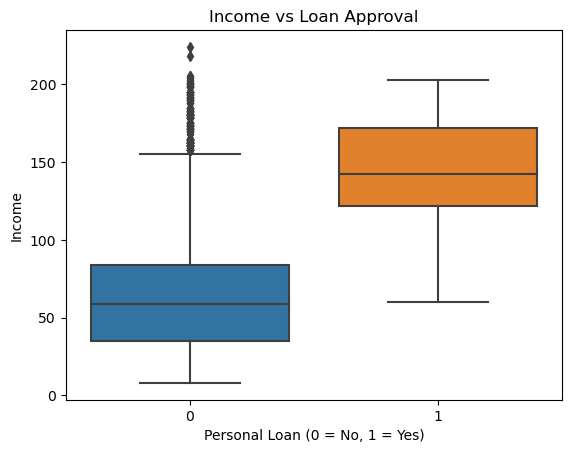

In [15]:
sns.boxplot(data=df,x="Personal Loan",y="Income")
plt.title('Income vs Loan Approval')
plt.xlabel('Personal Loan (0 = No, 1 = Yes)')
plt.ylabel('Income')
plt.show()

In [16]:
#People with loan approval (Personal Loan = 1) generally have a higher median income.

#Some outliers may exist, but overall, income has a positive influence on loan approval.

In [17]:
# Overview:
# There is a clear pattern: customers with higher income are more likely to be approved for a loan.
# This makes logical sense, as banks prefer lending to individuals who earn more and can repay loans reliably.

# Which features are most correlated with loan approval?

In [18]:
df.corr()["Personal Loan"].sort_values(ascending=True)

ID                   -0.024801
Age                  -0.007726
Experience           -0.007413
ZIP Code              0.000107
CreditCard            0.002802
Online                0.006278
Securities Account    0.021954
Family                0.061367
Education             0.136722
Mortgage              0.142095
CD Account            0.316355
CCAvg                 0.366889
Income                0.502462
Personal Loan         1.000000
Name: Personal Loan, dtype: float64

In [19]:
# Overview:
# The features most likely influencing personal loan approval are:

# CD Account: Customers with a certificate of deposit (CD) account are more likely to get approved.

# Income and Credit Card Average Spend (CCAvg): Higher values mean a better chance of approval.

# Education: Higher education levels slightly increase the chance of loan approval.



# Does Education level or Family size affect the chances of loan approval?

In [20]:
df.columns


Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

Text(0, 0.5, 'Approval Rate')

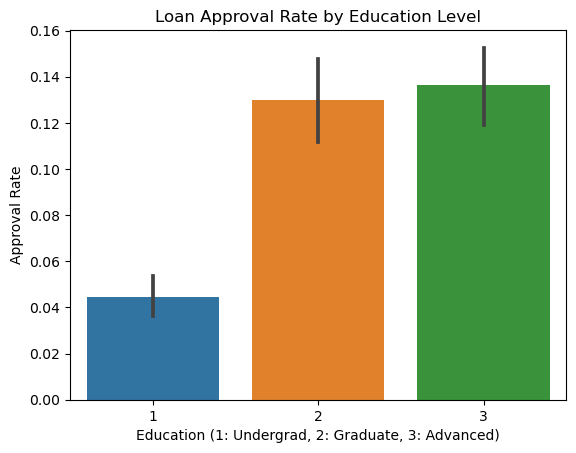

In [22]:
#Education Vs Personal Loan
sns.barplot(data=df,x="Education",y="Personal Loan")

plt.title('Loan Approval Rate by Education Level')
plt.xlabel('Education (1: Undergrad, 2: Graduate, 3: Advanced)')
plt.ylabel('Approval Rate')


Text(0, 0.5, 'Approval Rate')

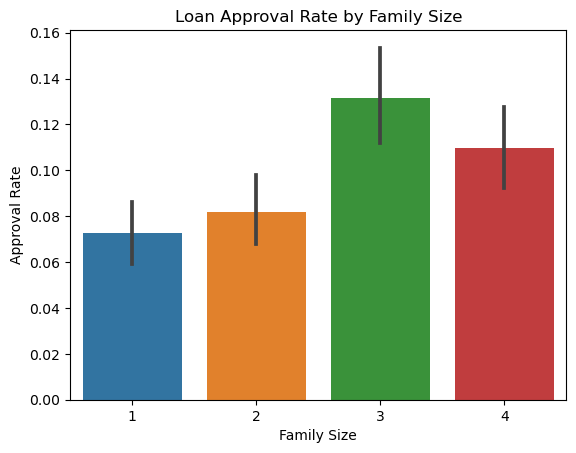

In [27]:
#Family Vs Personal Loan
sns.barplot(data=df,x="Family",y="Personal Loan")
plt.title("Loan Approval Rate by Family Size")
plt.xlabel('Family Size')
plt.ylabel('Approval Rate')

In [28]:
#What You’ll Likely Observe:
# Higher Education Levels (2 and 3) show higher loan approval rates.

# Family size = 4 may have the highest approval rate, but too large families might lower approval probability again.



In [29]:
# Overview:
# Education clearly impacts loan approval.
# People with higher education (graduate or advanced degrees) are more likely to get approved.

# Family Size also plays a role. Families of size 3 or 4 tend to have higher approval rates,
# possibly because they represent balanced responsibility and income ratios.




# Do people with a CD Account or Credit Card have higher chances of getting a loan?

In [30]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [31]:
df["CD Account"].value_counts()

CD Account
0    4698
1     302
Name: count, dtype: int64

Text(0, 0.5, 'Approval Rate')

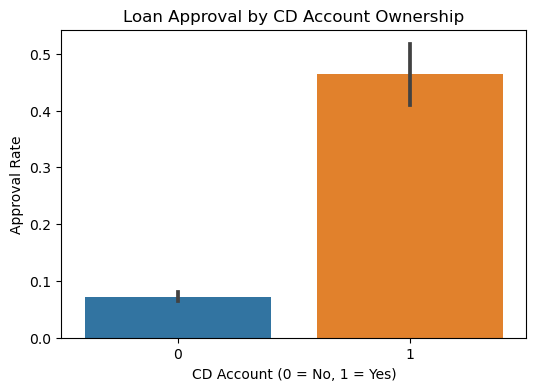

In [35]:
#CD Account Vs Loan Approval
plt.figure(figsize=(6, 4))
sns.barplot(data=df,x="CD Account",y="Personal Loan")
plt.title('Loan Approval by CD Account Ownership')
plt.xlabel('CD Account (0 = No, 1 = Yes)')
plt.ylabel('Approval Rate')

In [36]:
df["CreditCard"].value_counts()


CreditCard
0    3530
1    1470
Name: count, dtype: int64

Text(0, 0.5, 'Approval Rate')

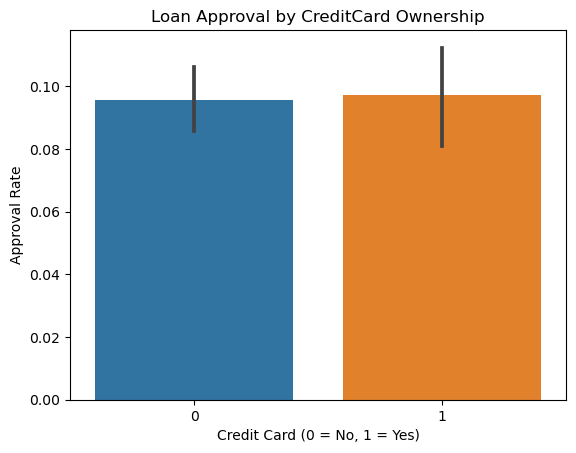

In [39]:
#CreditCard Vs Loan Personal 
sns.barplot(data=df,x="CreditCard",y="Personal Loan")
plt.title("Loan Approval by CreditCard Ownership")
plt.xlabel('Credit Card (0 = No, 1 = Yes)')
plt.ylabel('Approval Rate')


In [40]:
# CD Account = 1: Customer has a Certificate of Deposit account.

# CreditCard = 1: Customer owns a credit card.

In [41]:
# Overview:
    
# Having a CD Account significantly increases the chance of getting a personal loan. 
# It likely signals financial stability to the bank.

# Credit Card ownership shows a smaller but positive impact — it may indicate good credit history or financial experience.

# Correlation Heatmap

# How do all features relate to each other and to loan approval?

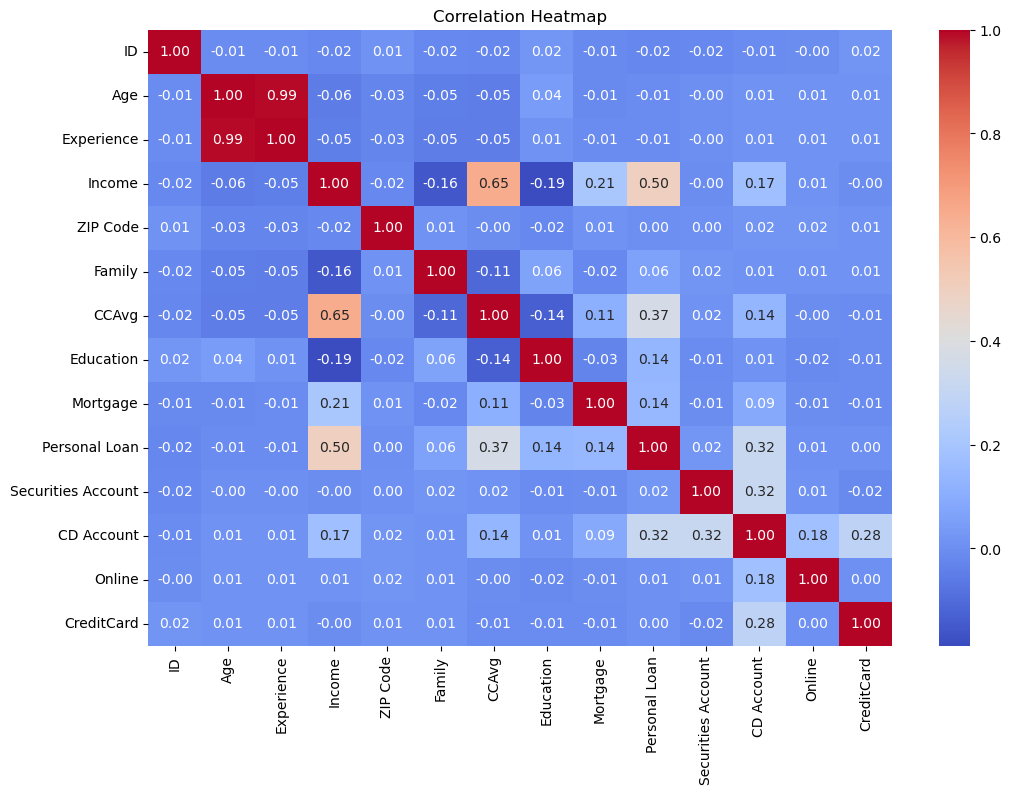

In [42]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Explanation:
sns.heatmap() shows pairwise correlation between columns.

Values close to +1 mean strong positive relationship.

Values close to -1 mean strong negative relationship.

In [43]:
# Personal Loan is positively correlated with:

# CD Account (~0.31)

# Income (~0.30)

# CCAvg (~0.22)

# Education (~0.14)

In [44]:
# Overview:
    
    
# The heatmap visually confirms our earlier findings:

# CD Account, Income, and CCAvg are most predictive of loan approval.

# Correlation maps help in feature selection for future modeling.

# Some variables (like ID, ZIP Code) do not contribute meaningful insights and can be dropped from modeling.

In [50]:
#ID, ZIP Code columns in data set is unhelpful columns so remove these columns
df.drop(columns=["ID","ZIP Code"],inplace=True)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [53]:
#Conclusions:

# In this project, we performed an in-depth Exploratory Data Analysis (EDA) on a bank's personal loan dataset to uncover patterns and insights related to loan approval.
# We discovered that key factors such as income, credit card usage (CCAvg), education level, and especially ownership of a CD account significantly influence loan approval decisions. 
# Using visualizations and correlation analysis, we identified the most important features that banks may consider when evaluating loan applications.

# These insights can help financial institutions build more effective loan prediction models, design better customer targeting strategies, and improve decision-making processes.
# The next step in this analysis would be to develop a machine learning model to predict loan approval based on the selected features.

# Overall, this project demonstrates the power of data analysis in understanding customer behavior and supporting data-driven decision making in the banking sector.

